In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = sns.load_dataset('mpg')

In [18]:
X = df.iloc[:, 1:-2]
y = df['mpg']
X.head(1)

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70


In [40]:
pipeline_lr = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    PolynomialFeatures(3),
    LinearRegression()
)

pipeline_lr = pipeline_lr.fit(X, y)

In [27]:
reg = pipeline_lr.named_steps['linearregression']
print(f"coefficients: {reg.coef_}")
print(f"coefficients: {reg.intercept_}")

coefficients: [-9.73691413e-13 -3.83571370e+00 -7.22161674e-01 -6.20507165e+00
 -1.12605413e+00 -2.33818500e+00  2.58657295e+00  4.31898157e-01
 -1.10797803e+01  2.78730647e+00  1.97831461e+00  1.66879176e+00
 -5.43333833e-01  7.82872145e+00 -7.72340914e-01  2.81759150e-01
 -1.80369861e+00  3.02323530e-01  4.23842679e-03 -2.30887738e+00
 -1.64801560e+00 -2.15556984e-03  8.03332212e-01  9.85085042e-01
 -7.68094342e-01 -2.21507487e-01 -9.39080487e-03  8.44900793e-01
  3.91268209e+00  3.21353081e+00  4.70863397e+00 -7.64472532e+00
  2.93668302e+00 -5.05305713e-01 -2.11220435e+01  4.97407604e-01
  2.54939905e+01 -8.85138268e+00 -3.63597380e+00  1.86869676e+00
 -7.52648234e+00  4.36882469e+00  1.63160003e+00 -1.96853531e+00
 -1.53793824e+00  2.94439999e+00  1.18672934e+00 -1.26890338e+00
 -7.55562899e-01  1.67721362e+01 -3.88057327e+00 -1.91719595e+01
  9.47976501e+00  6.39830251e+00 -6.38537865e+00  1.61753503e+01
 -3.01286322e+00 -5.19782275e+00 -3.02046656e+00 -4.08234166e+00
 -3.0647126

<BarContainer object of 84 artists>

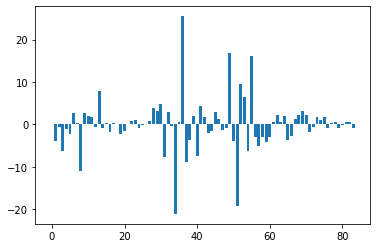

In [28]:
plt.bar(range(len(reg.coef_)), reg.coef_)

In [75]:
from sklearn.linear_model import Ridge

In [79]:
def my_plot():
    my_df = df.sample(frac=0.8)
    X = my_df.iloc[:, 1:-3]
    y = my_df['mpg']


    pipeline_lr = make_pipeline(
        SimpleImputer(),
        StandardScaler(),
        PolynomialFeatures(3),  # Increase model complexity  # --> 2 - 5
        #LinearRegression()
        Ridge(alpha=1.0)  # 0.0001 - 1.0
    )

    pipeline_lr = pipeline_lr.fit(X, y)
    #reg = pipeline_lr.named_steps['linearregression']
    reg = pipeline_lr.named_steps['ridge']
    print(f"Intercept {reg.intercept_}")
    return plt.bar(range(len(reg.coef_)), reg.coef_)

Intercept 21.434679695917005


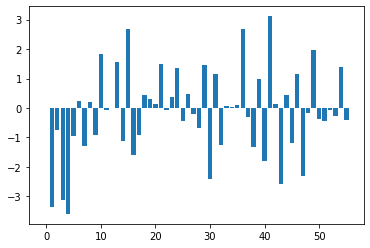

In [83]:
my_plot();plt.show()

Intercept 21.54538306804751


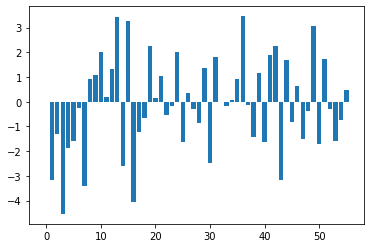

In [84]:
my_plot();plt.show()

Intercept 22.22898224550967


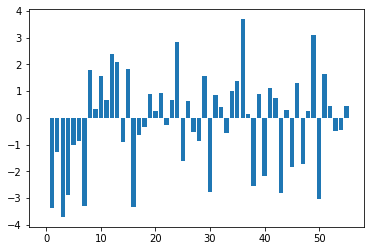

In [85]:
my_plot();plt.show()

In [122]:
from sklearn.linear_model import Lasso, ElasticNet

In [87]:
from sklearn.model_selection import GridSearchCV

In [123]:
pipeline_lr = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    PolynomialFeatures(),
    #Ridge()
    #Lasso()
    ElasticNet()
)

pipeline_lr = pipeline_lr.fit(X, y)

In [124]:
pipeline_lr.named_steps

{'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                    order='C'),
 'elasticnet': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=None, selection='cyclic', tol=0.0001, warm_start=False)}

In [125]:
# Namensgebung für Paramter: pipelinename__paramtername
parameter_grid = {'polynomialfeatures__degree' : [1, 2, 3, 4, 5], 
             #'ridge__alpha' : [0, 0.01, 0.05, 0.1, 1.0, 2.0, 10.0, 100.0, 1000.0]}
             #'lasso__alpha' : [0, 0.01, 0.05, 0.1, 1.0, 2.0, 10.0, 100.0, 1000.0]}
             'elasticnet__alpha' : [0, 0.01, 0.05, 0.1, 1.0, 2.0, 10.0, 100.0, 1000.0],
             'elasticnet__l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
search = GridSearchCV(pipeline_lr, param_grid=parameter_grid)
search.fit(X, y)
print(search.score(X, y))
search.best_params_

/home/jupyter/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jupyter/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:356: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/home/jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166.3933275222307, tolerance: 1.2470122830188681
  positive

0.8940349261524547


/home/jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1023.8701786798714, tolerance: 1.8128036477987421
  positive)


{'elasticnet__alpha': 0.01,
 'elasticnet__l1_ratio': 0,
 'polynomialfeatures__degree': 2}

In [126]:
search.best_params_

{'elasticnet__alpha': 0.01,
 'elasticnet__l1_ratio': 0,
 'polynomialfeatures__degree': 2}

In [127]:
search.best_estimator_.named_steps['elasticnet'].coef_

array([ 0.        ,  0.95055516, -2.19821904, -2.14668971, -3.77530634,
       -0.21947923,  2.45465789, -0.45519116,  0.30928944,  0.75308957,
        0.38670205,  0.97659993, -0.54513934, -0.24307871,  0.61523657,
        1.12482013, -1.01385042,  1.05525949,  0.0387293 , -1.00490956,
       -0.15342766,  0.28292859,  0.47795843,  0.02170476, -1.00859324,
       -0.05520389,  0.54956094,  0.65065157])

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [151]:
pipeline_dt = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    PolynomialFeatures(),
    DecisionTreeRegressor()
)

pipeline_dt = pipeline_dt.fit(X, y)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [152]:
# Namensgebung für Paramter: pipelinename__paramtername
parameter_grid = {'polynomialfeatures__degree' : [1, 2, 3, 4, 5], 
             'decisiontreeregressor__max_depth' : range(1, 25)
}
search = GridSearchCV(pipeline_dt, param_grid=parameter_grid)
search.fit(X_train, y_train)
print(search.score(X_test, y_test))
search.best_params_

# --> ACHTUNG: Gefahr des Overfittings bei dieser Modellklasse

/home/jupyter/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7184167998153732


/home/jupyter/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'decisiontreeregressor__max_depth': 9, 'polynomialfeatures__degree': 2}

In [155]:
X.head(1)

,cylinders,displacement,horsepower,weight,acceleration,model_year
15,6,198.0,95.0,2833,15.5,70


In [169]:
search.predict([[3, 100, 250, 3000, 15.5, 70]])

array([24.3])